# Determining the Effect of Lateralization on Functional Connectivity: A Bottom Up Approach

## Intro

We were inspired by the correlation matrix we saw in week seven in which demonstrated that bilateral brain region pairs were more highly correlated with each other than with other regions.  This spawned the question of how the extent of functional lateralization effects the connectivity of the bilateral pairs.  We define lateralization as the difference in stimuli processing, for instance, broca’s area is a language processing area typically found in the left hemisphere that is not found in the same region in the bilateral hemisphere (meaning it’s bilateral partner is not involved in language processing).  With the knowledge that lateralization differs, and that there is variation in the correlation of bilateral regions, we hypothesized that lateralization would modulate the connectivity correlation of bilateral pairs, in that higher lateralization would lead to a lower correlation coefficient. 

Previous research has looked at the role of lateralization on functional connectivity within each hemisphere.  Nielsen and colleagues pre-defined a set of 20 lateralized brain regions, and found how that left and right lateralized hubs form separable local networks (Nielsen et al., 2013).  Instead of  using the preconceived knowledge of which regions are significantly lateralized to find how the correlation varies, we wanted to us a data driven approach to find the regions with the highest and lowest functional connectivity, and then determine whether these regions correspond to regions known to be/to not be lateralized.



## Data Acquisition

We obtained our data from the ABIDE preprocessed database.  This database consists of data from participants with autism spectrum disorder as well as typically developing (TD) controls.  For this analysis, we used the data from 21 TD participants ((avg. age=23.2, 15 male, avg. IQ=118.26).  The data was preprocessed using The data was preprocessed using global filtering with the Configurable Pipeline for the Analysis of Connectomes (CPAC).  



## Group Member Responsibilities

Dani:
<br>
-Downloading all pre-processed fMRI data from ABIDE
<br>
-Running statistical tests on correlation values of lateral pairs for the 21 participents
<br>
-Running statistical tests on distance and volume changes
<br>
-Comparison of our results to existing literature
<br><br>    
Aulden: 
<br>
-Creating the correlation matrix and ordering regions into lateral pairs 
<br>
-Extracting the correlation values for lateral pairs
<br>
-Extracting distance and volume measurements from Harvard-Oxford Max Probability Atlas 
<br>
-Displaying data on HO atlas brain (correlation values, volume diff)

## Code for Project

In [1]:
import os,sys
import numpy,pandas
import matplotlib.pyplot as plt
import nilearn.regions
import nilearn.plotting
import nilearn.input_data
import nilearn.datasets
import nilearn.connectome
import nibabel
from nibabel.gifti.gifti import GiftiImage,GiftiDataArray
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import scipy.stats
import networkx as nx
import bct
import pkg_resources
import numpy
import math
import numpy
import matplotlib.pyplot as plt
from brainnetworks.r2z import r_to_z,z_to_r
from brainnetworks.utils import nx_to_igraph

from brainnetworks.utils import nx_to_igraph

DATA_PATH = pkg_resources.resource_filename('brainnetworks',
                                            'data/')
                                            
%matplotlib inline


## Statistical Analysis
### Correlation Values

To find the regions corresponding to the highest and lowest connectivity, we transformed the correlation values of the bilateral pairs for each participant to Z-scores.  We then averaged across participants to obtain the average Z-score of connectivity for the bilateral pairs, and transformed these values back to correlation coefficients.  These transformations were necessary to maintain potential differences in negative vs positive correlations (however, there were no negative correlations in the individual participant data).  We then found the averaged correlation values that were above the 90th percentile and below the 10th percentile.


In [24]:
##DANI'S LOADING OF DATA AND REGRESSION ANALYSIS BELOW

#data=(numpy.load('USM_0050440_rois_ho_data.npy'),numpy.load('USM_0050441_rois_ho_data.npy'),numpy.load('Leuven_1_0050691_rois_ho_data.npy'),numpy.load('Leuven_1_0050692_rois_ho_data.npy'),numpy.load('Leuven_1_0050703_rois_ho_data.npy'),numpy.load('Leuven_1_0050706_rois_ho_data.npy'),numpy.load('Leuven_1_0050707_rois_ho_data.npy'),numpy.load('NYU_0051057_rois_ho_data.npy'),numpy.load('NYU_0051058_rois_ho_data.npy'),numpy.load('NYU_0051059_rois_ho_data.npy'),numpy.load('NYU_0051060_rois_ho_data.npy'),numpy.load('NYU_0051061_rois_ho_data.npy'),numpy.load('Olin_0050115_rois_ho_data.npy'),numpy.load('Pitt_0050030_rois_ho_data.npy'),numpy.load('Pitt_0050058_rois_ho_data.npy'),numpy.load('Trinity_0050260_rois_ho_data.npy'),numpy.load('Trinity_0050261_rois_ho_data.npy'),numpy.load('Trinity_0050262_rois_ho_data.npy'),numpy.load('UM_1_0050348_rois_ho_data.npy'),numpy.load('UM_2_0050388_rois_ho_data.npy'),numpy.load('USM_0050439_rois_ho_data.npy'),numpy.load('USM_0050440_rois_ho_data.npy'),numpy.load('USM_0050441_rois_ho_data.npy'))
import numpy as np
#data=np.average(data, axis=0)
from itertools import combinations
from scipy.stats import ttest_ind
#avg_data=z_to_r(numpy.asarray(data))
top_cutoff=np.percentile(avg_data,90)
bottom_cutoff=np.percentile(avg_data,10)
top_regions=[]
bottom_regions=[]
for i in range(len(avg_data)):
    if avg_data[i]>=top_cutoff:
        top_regions.append([i,avg_data[i]])
    if avg_data[i]<=bottom_cutoff:
        bottom_regions.append([i,avg_data[i]])
print(top_regions)
print(bottom_regions)
top_regions_vals=[]
for i in range(len(top_regions)):
    top_regions_vals.append([top_regions[i][1]])
bottom_regions_vals=[]
for i in range(len(bottom_regions)):
    bottom_regions_vals.append([bottom_regions[i][1]])
bottom_pval=ttest_ind(avg_data,bottom_regions_vals)
top_pval=ttest_ind(avg_data,top_regions_vals)

[[23, 0.9546162050143386], [30, 0.9350616484018175], [37, 0.904977509829282], [42, 0.9037968930305712], [46, 0.902273339682573], [54, 0.9471065902218891]]
[[1, 0.5120709543686627], [12, 0.447988241124564], [15, 0.4357678788680506], [21, 0.4958459559405276], [43, 0.4018111844256861], [47, 0.3249311084666492]]


# Correlation analysis results

The correlation values for the most correlated and least correlated regions are listed below (and above however they are not labeled above).  We hypothesized that the most correlated regions would be the least lateralized and vice versa.  The regions identified to have the highest correlation coefficients support our hypothesis fairly well, especially none of the regions with the highest correlation coefficients were identified as lateralization hubs by Nielsen and colleagues.  most  of these regions (Postcentral gyrus, Occipital fusiform gyrus, Intracalcarine sulcus, Occipital pole) are early processing regions (primary somatosensory, V4, and V1 respectively) and have not been found to be highly lateralized (aside from the fact that they respond to contralateral visual and somatosensory fields, but that is different from our definition of lateralization).  Similarly, the lingual gyrus plays a role in perception and has not been found to be significantly lateralized, despite people having investigated it’s lateralization (Fusar-Poli et al., 2009). The lateralization (or lack thereof) of the Precuneus, however, is less clear.  The left precuneus has been shown to be more highly recruited during arithmetic (Pinel and Dehaene, 2010), as well as during episodic memory retrieval (Lundstrom et al, 2013), however a review conducted by Cavanna and Trimble found no such evidence of lateralization (Cavanna and Trimble, 2006).  

The regions found to have the lowest correlation values mostly corresponded with the literature.  Among these regions were Broca’s area, Wernicke’s area, and the insula (frontal opperculum cortex), which have all been shown to be heavily lateralized in literature. Broca’s and Wernicke’s area, typically found in the left hemisphere, are specialized for processing language (Zatorre et al., 1992; Grodzinsky, 2000), and the insula has been shown to have lateralized functional connectivity (Cauda et al, 2011).  Additionally, these three regions were included in the list of lateralized hubs analyzed by Nielsen and colleagues.  The fact that these regions were found to have the lowest connectivity provide the strongest evidence to support our hypothesis.  Interestingly, we found the caudate nucleus to be one of the least correlated regions, despite there being little to no evidence of lateralization in this region.  While less well known as a lateralized region, we identified the temporal fusiform cortex as one of the lowest connected regions.  Literature seems to support this, for example research has found that there are hemispheric differences in response to perceptual priming (Koustal et al., 2001), as well as lateralized functioning in verbal vs non-verbal tasks.  There is not much literature on the lateralization of inferior temporal gyrus, indicating that there may be a lack of evidence for lateralization in this region.   
  

### Highest correlated region (r): Postcentral gyrus(.95), Occipital pole(.95), Intracalcarine sulcus(.94),Precuneus(.9), Lingual gyrus(.9), Occipital fusiform gyrus(.9)

### Lowest correlated region (r): Caudate nucleus(.51), Inferior temporal gyrus, anterior(.50), Inferior frontal gyrus(.45), Superior temporal gyrus(.44), Temporal fusiform cortex(.40), Frontal operculum Cortex(.32)




## Extracting Correlation Values for Lateral Pairs
<br>
Building the Correlation Matrix
We built the correlation matrix very similar to how it was done in the Week 7 Resting fMRI notebook. The only difference is that, before converting the time series data into a matrix of correlation values, we first ordered the time series to have all left regions go first followed by all right regions in the same order (Left Region 1, Left Region 2,...Right Region 1, Right Region 2…). This created a correlation matrix with characteristic diagonals in the first and third quadrant that show relatively strong connectivity between lateral pairs. It also removed the mysterious region #3455 that appears in ABIDE data sets. We then extracted the data from the diagonal of one quadrant to get the lateral correlation values for each participant. 


In [2]:
#creates an ordered list of data labels for the HO parcellations
#this works for alll samples (theoretically)

#your file path for this might be diff
labelfile=os.path.join('/home/vagrant/project/ho_labels.csv')

labeldata=pandas.read_csv(labelfile)
labeldata=labeldata.values
#when taking .values, took extra row, so remove first one
labeldata=labeldata[1:111,]

#function to separate the labels left & right
def cleanlabels (label):
    return [ '#%s'% label[0], label[1].split(" ")[0], " ".join( label[1].split(" ")[1:] )]

#for just cleaning the region
def cleanlabels2(label):
    return[ label.split(" ")[0], " ".join( label.split(" ")[1:] ).replace(",",";") ]

#now i have an array with each entry [ROI #, hemisphere, area]
newlabels = list(map(cleanlabels, labeldata))

#sort via hemisphere. 
#I use this later for getting a dictionary of gegion-> correlation coef
newlabels = sorted(newlabels, key=lambda newlabels: newlabels[1])    

In [3]:
#FUNCTION
#TAKES: (time series data, ordered labels [like the ones above])
#RETURNS: list of ordered pairs (region, corrcoef)
#NOTE: region is not L,R specific, since they would be equal. (list is 55 pairs long)

def data_to_latcoef(tsdata, labels):

    #returns an ordered list of number labels
    numlabel = [item[0] for item in labels]
    #creates an empty list to fill with our ordered time series
    orderedts = []
    for item in numlabel:
        orderedts.append(tsdata[item].values)
        #convert from list to array
        
    orderedts=numpy.asarray(orderedts)
    #need to transpose
    orderedts = numpy.transpose(orderedts)
      
    tscorr=numpy.corrcoef(orderedts[:,0:].T) #I have already dropped the 0 roi data
    # we end up with a few NAN values because of an empty ROI, for now just zero them out
    tscorr[numpy.isnan(tscorr)]=0
        
    #initialize list
    lateralcoef = []
        
    #there are 55 brain regions (not differentiating left and right). 
    #this for loop goes from 0 up to but not including 55
    for x in range(0,55):
            
        lateralcoef.append( [ labels[x][2] , tscorr[x,x+55] ] )
        #[ "name of brain region", corrcoef]
        #[x,x+55] is location of left and right corr coef
    return(lateralcoef)



In [41]:
#If I wanted to generate the correlation matrix, which I don't right now

#tscorr=numpy.corrcoef(orderedts[:,0:].T) #I have already dropped the 0 roi data

# we end up with a few NAN values because of an empty ROI, for now just zero them out
#tscorr[numpy.isnan(tscorr)]=0

#plt.imshow(tscorr)
#plt.colorbar()

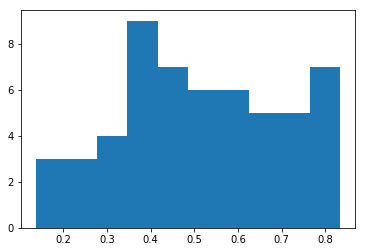

In [4]:
#Here is an axample of it in action
#load in single time series data
sampledata = pandas.read_table("/home/vagrant/project/KKI_0050822_rois_ho.1D")

samplecoef = data_to_latcoef(sampledata, newlabels)

#here's a nice histogram :) 
plt.hist( [item[1] for item in samplecoef], bins=10)
plt.show()

#hmm it's a funny looking distr. But that's not unusual since we only have one participent 
#I wonder how the average over the diff participents will look!

## Extracting Distance and Volume Comparison's from the Harvard Oxford Atlas

In [5]:
#So the HO atlas loaded from nilearn comes in two parts : subcortical and cortical
#It also has a bunch of extra regions (background, ventricles, etc), 
#but if i make it driven by the labels themselves

dataset= nilearn.datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm', 
                                                      symmetric_split=True)
dataset2=nilearn.datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr25-2mm', 
                    symmetric_split=True)

atlas_filename = dataset.maps
atlas_labels=dataset.labels
atlas_filename2 = dataset2.maps
atlas_labels2 = dataset2.labels

#for volume calc
data_array = numpy.array(atlas_filename.dataobj)
data_array2 = numpy.array(atlas_filename2.dataobj)

#for distance calculations
coord = nilearn.plotting.find_parcellation_cut_coords(atlas_filename)
coord2 = nilearn.plotting.find_parcellation_cut_coords(atlas_filename2)

# +1 avoids the background
pairedcoord1=[]
for i,val in enumerate(coord):
    pairedcoord1.append([atlas_labels[i+1],val])

pairedcoord2=[]
for i,val in enumerate(coord2):
    pairedcoord2.append([atlas_labels2[i+1],val])
    
pairedcoord=pairedcoord1+pairedcoord2

#+1 ignores background
pairedvol1 = []
for i in range (0,96):
    pairedvol1.append([atlas_labels[i+1], 
                       numpy.sum((data_array==i+1).astype(numpy.int))])
    
pairedvol2 = []
for i in range(0,22):
    pairedvol2.append([atlas_labels2[i+1], 
                       numpy.sum((data_array2==i+1).astype(numpy.int))])

#still have some sketch background measurements, but I'll deal with that later
pairedvol = pairedvol1+pairedvol2


In [6]:
#separate the hemisphere from the rest of the label to make it easier to compare lateral regions
#clean up a bit by only taking "Left" and "Right" regions

newpairedcoord=[]
for item in pairedcoord:
    clean = cleanlabels2(item[0])
    if clean[0] == 'Right' or clean[0] == 'Left':
        newpairedcoord.append( [clean,item[1] ] )
        
newpairedvol=[]
for item in pairedvol:
    clean = cleanlabels2(item[0])
    if clean[0] == 'Right' or clean[0] == 'Left':
        newpairedvol.append( [clean,item[1] ] )

In [7]:
#calculate distance between coords and % volume difference

#distance between two x,y,z coords
def distance (array1,array2):
    dx = array1[0] - array2[0]
    dy = array1[1] - array2[1]
    dz = array1[2] - array2[2]
    return( math.sqrt(dx**2 + dy**2 + dz**2) )

#will fill this with [region, distance between, %vol diff]
master=[]

#only goes to 55 so that I don't repeat regions
for x in range(0,55):
    itemz = newlabels[x]
    region = itemz[2]
    title1 = ["Left",itemz[2]]
    title2 = ["Right",itemz[2]]

    #coord dist
    index1 = [item[0] for item in newpairedcoord].index(title1)
    coord1 = newpairedcoord[index1][1]
    index2 = [item[0] for item in newpairedcoord].index(title2)
    coord2 = newpairedcoord[index2][1]
    distdiff = distance(coord1, coord2)

    #volume diff
    index3 = [item[0] for item in newpairedvol].index(title1)
    vol1 = newpairedvol[index3][1]
    index4 = [item[0] for item in newpairedvol].index(title2)
    vol2 = newpairedvol[index4][1]
    vols=[vol1,vol2]
    vols.sort()
    diffvol = vols[0]/vols[1]

    master.append( [region, distdiff, diffvol] )


In [8]:
#save master
numpy.save('masterdata.npy',master)

## Combining Structural Data With Average Correlations

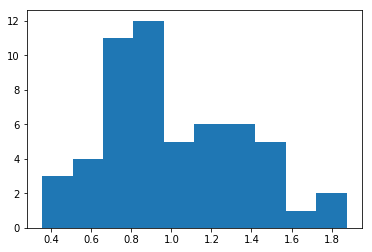

In [29]:
#okay now i need to import the coef values from the study, which Dani found using the data_to_latcoef func 
# Dani's code is at the end of the notebook

partpath='/home/vagrant/project/part_data'
p1 = numpy.load('/'.join([partpath,'Leuven_1_0050691_rois_ho_data.npy']))
p2 = numpy.load('/'.join([partpath,'Leuven_1_0050692_rois_ho_data.npy']))
p3 = numpy.load('/'.join([partpath,'Leuven_1_0050703_rois_ho_data.npy']))
p4 = numpy.load('/'.join([partpath,'Leuven_1_0050706_rois_ho_data.npy']))
p5 = numpy.load('/'.join([partpath,'Leuven_1_0050707_rois_ho_data.npy']))
p6 = numpy.load('/'.join([partpath,'NYU_0051057_rois_ho_data.npy']))
p7 = numpy.load('/'.join([partpath,'NYU_0051058_rois_ho_data.npy']))
p8 = numpy.load('/'.join([partpath,'NYU_0051059_rois_ho_data.npy']))
p9 = numpy.load('/'.join([partpath,'NYU_0051060_rois_ho_data.npy']))
p10 = numpy.load('/'.join([partpath,'NYU_0051061_rois_ho_data.npy']))
p11 = numpy.load('/'.join([partpath,'Olin_0050115_rois_ho_data.npy']))
p12 = numpy.load('/'.join([partpath,'Pitt_0050030_rois_ho_data.npy']))
p13 = numpy.load('/'.join([partpath,'Pitt_0050058_rois_ho_data.npy']))
p14 = numpy.load('/'.join([partpath,'Trinity_0050260_rois_ho_data.npy']))
p15 = numpy.load('/'.join([partpath,'Trinity_0050261_rois_ho_data.npy']))
p16 = numpy.load('/'.join([partpath,'Trinity_0050262_rois_ho_data.npy']))
p17 = numpy.load('/'.join([partpath,'UM_1_0050348_rois_ho_data.npy']))
p18 = numpy.load('/'.join([partpath,'UM_2_0050388_rois_ho_data.npy']))
p19 = numpy.load('/'.join([partpath,'USM_0050439_rois_ho_data.npy']))
p20 = numpy.load('/'.join([partpath,'USM_0050440_rois_ho_data.npy']))
p21 = numpy.load('/'.join([partpath,'USM_0050441_rois_ho_data.npy']))

#there is definately a better way to do this omg
avgcoef = []
for x in range(0,55):
    valarray = numpy.asarray( [p1[x],p2[x],p3[x],p4[x],p5[x],p6[x],p7[x],p8[x],
               p9[x],p10[x],p11[x],p12[x],p13[x],p14[x],p15[x],
               p16[x],p17[x],p18[x],p19[x],p20[x],p21[x]] )
    avgcoef.append( [newlabels[x][2],numpy.mean(valarray)] )

#here's a pretty little histogram
plt.hist( [item[1] for item in avgcoef], bins=10)
plt.show()

Text(0,0.5,'Distance Between Regions')

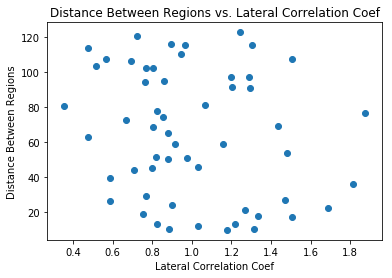

In [9]:
#graph dist vs lateral corr coef
import matplotlib.pyplot as plt

allcoef = [item[1] for item in avgcoef]
alldist = [item[1] for item in master]
allvol = [item[2] for item in master]

plt.scatter(allcoef,alldist)
plt.title('Distance Between Regions vs. Lateral Correlation Coef')
plt.xlabel("Lateral Correlation Coef")
plt.ylabel("Distance Between Regions")

Text(0,0.5,'% Volume Diff')

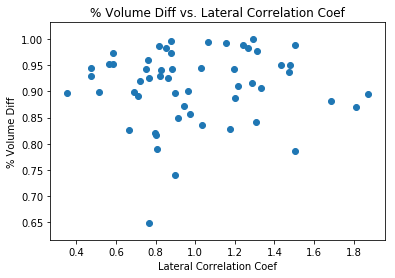

In [10]:
#graph volume vs lateral corr coef
plt.scatter(allcoef, allvol)
plt.title('% Volume Diff vs. Lateral Correlation Coef')
plt.xlabel("Lateral Correlation Coef")
plt.ylabel("% Volume Diff")


In [11]:
#angular gyrus and Middle Temporal Gyrus: temporooccipital part have greatest diff in vol
#sorted(master, key=lambda master: master[2])  

#sorted(master, key=lambda master: master[1])

## Combining Structural Data With Z-Scored R-Correlations
<br>
In general, it is very difficult to measure lateralization. Doing so often requires looking at Split Brain patients or causing transient anaesthesia through sodium amytal: invasive techniques we were not able to employ for the purpose of this project (Toga et al, 2003). Instead, we settled with seeing if we could compare our findings of functional connectivity with structural asymmetry. To do so, we used the Harvard-Oxford cortical and subcortical structural atlases. These atlases were derived from the T1-weighted images of 21 healthy male and 16 healthy female subjects (ages 18-50) individually segmented by the CMA. Labels were combined across subjects to form population probability maps for each label. (Makris et. al, 2006; Frazier et. al, 2005; Desikan et. al, 2006; Goldstein et. al, 2007). For our project, we used the maximum probability labels, treating each label as a separate region, for a total of 110 regions (55 separating into left and right).
<br> <br>
There are a couple problems with using the Harvard-Oxford atlas for structural data. For one, since the Harvard-Oxford parcellation is an average of 37 participants, it alone does not  represent a realistic brain. As we learned in class, parcellation varies drastically between individuals (Gordon et al, 2017). Being so, the Harvard-Oxford parcellation does not represent the parcellation of an “average” person, just the average across a subset of varying individuals.  However, we thought that if there were a strong trend between lateral correlation and either distance or volume differences, this would appear despite the variability between regions. 
<br> <br>
Using the Harvard-Oxford atlas allowed us to test two structural characteristics: distance between regions and volume differences between regions. 
<br><br>
### Distance <br>
To test the distance between regions, we looked at distance between the center of mass of one brain region from its lateral partner’s center of mass. Past studies have revealed that interhemispherically, shorter anatomical distances predict stronger functional connectivity between regions, and that the strength of this prediction can vary depending on task. (Mazziotta et. al, 2001). Symmetric intrahemispheric connections, however, are stronger than predicted by the anatomical distance between bilaterally homologous regions (Raymond et al, 2005).  This is also something we saw first hand while computing functional connectivity for the Midnight Scan Club project in our Week 7 notebook; the resulting correlation matrix of this notebook revealed diagonals of relatively strong connectivity along the diagonals of the first and third quadrant, which contained the correlation coefficients between lateral partners. 
<br><br>
We did not see any correlation between functional connectivity and and distance between regions (R^2 = .05). This is not surprising given our visual projection of R-Scored correlations on the HO brain (plotted in the Displaying Data section of the notebook). We can see from this that there is a mix of correlated and uncorrelated pairs both in the center and along the periphery of the brain. For example, the least-correlated region (the caudate nucleus, with r=.51) has regions located right next to each other in the center of the brain.
<br><br>
### Volume <br>
Testing volume was motivated by a number of studies connecting physical brain asymmetry to functional brain asymmetry. One example is Wernicke’s area, which is known to have heavily lateralized functions for language and speech production. The plana temporale, the region of the brain housing Wernicke’s area, is known to be asymmetrical between hemispheres. This finding suggested that the study of structural asymmetries might lend more clues to understanding the neuroanatomical basis of lateralized brain function (Watkins et al, 2001).  
<br><br>
To test differences in volume, we summed the voxels in each brain region (according to the HO Max Prob Atlas) and compared the value with that of its lateral partner. We then calculated the ratio of the smaller region over the larger region. 
<br><br>
The result was a finding of no correlation between functional connectivity and the volume differences of lateral pairs (R^2 = .003). However, our data did reveal structural asymmetries that agreed with those found in other studies. For example, our areas of most and least asymmetry corresponded with other studies looking at surface asymmetry of the brain (Toga et. al, 2003; Watkin et al, 2001). For example, all these studies found substantial asymmetry in the Planum Temporale and Angular Gyrus, which are regions also known to exhibit functional asymmetry. 



In [22]:
#load z score things, for Dani's stats work
statstuff = numpy.load('/home/vagrant/project/avg_data.npy')

#so I can run Dani's stuff later
avg_data = statstuff

avg_stat = []
for x in range(0,55):
    avg_stat.append( [newlabels[x][2],statstuff[x]] )



Text(0,0.5,'Distance Between Regions')

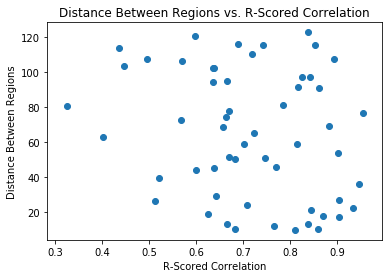

In [34]:
#graph dist vs lateral corr coef

allcoef2 = [item[1] for item in avg_stat]
alldist = [item[1] for item in master]
allvol = [item[2] for item in master]

plt.scatter(allcoef2,alldist)
plt.title('Distance Between Regions vs. R-Scored Correlation')
plt.xlabel("R-Scored Correlation")
plt.ylabel("Distance Between Regions")

Text(0,0.5,'% Volume Diff')

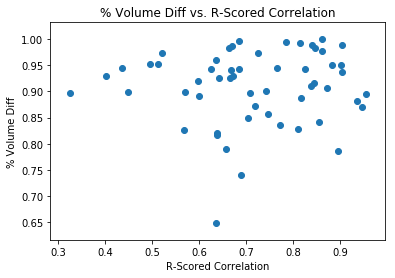

In [35]:
#graph volume vs lateral corr coef
plt.scatter(allcoef2, allvol)
plt.title('% Volume Diff vs. R-Scored Correlation')
plt.xlabel("R-Scored Correlation")
plt.ylabel("% Volume Diff")


## Displaying Data on Harvard-Oxford Atlas

In [13]:
#DISPLAY FOR VOLUME DIFFS
#RESULTING ARRAY IS PLEASEWORK4

#empty arrays 
corrdata_vertices7=numpy.zeros(atlas_filename.shape)
corrdata_vertices8 = numpy.zeros(atlas_filename2.shape)

#to fill the array
for i,entry in enumerate(master):
    #we don't wanna do anything for backgroung
    # ; to , to deal with diffs in entries
    region = entry[0].replace(";",",")
    val = entry[2]
    title1 = ' '.join(['Right',region])
    title2 = ' '.join(['Left',region])

    if (title1 in atlas_labels) and (title2 in atlas_labels) :
        imgindex1 = atlas_labels.index(title1)
        imgindex2 = atlas_labels.index(title2)
        corrdata_vertices7[data_array==imgindex1]=val
        corrdata_vertices7[data_array==imgindex2]=val
    elif (title1 in atlas_labels2) and (title2 in atlas_labels2):
        imgindex1 = atlas_labels2.index(title1)
        imgindex2 = atlas_labels2.index(title2)
        corrdata_vertices8[data_array2==imgindex1]=val
        corrdata_vertices8[data_array2==imgindex2]=val


In [14]:
#DISPLAY FOR R SCORED CORRELATIONS
#RESULTING ARRAY IS PLEASEWORK2

#empty arrays 
corrdata_vertices3=numpy.zeros(atlas_filename.shape)
corrdata_vertices4 = numpy.zeros(atlas_filename2.shape)

#to fill the array
for i,entry in enumerate(avg_stat):
    #we don't wanna do anything for backgroung
    # ; to , to deal with diffs in entries
    region = entry[0].replace(";",",")
    val = entry[1]
    title1 = ' '.join(['Right',region])
    title2 = ' '.join(['Left',region])

    if (title1 in atlas_labels) and (title2 in atlas_labels) :
        imgindex1 = atlas_labels.index(title1)
        imgindex2 = atlas_labels.index(title2)
        corrdata_vertices3[data_array==imgindex1]=val
        corrdata_vertices3[data_array==imgindex2]=val
    elif (title1 in atlas_labels2) and (title2 in atlas_labels2):
        imgindex1 = atlas_labels2.index(title1)
        imgindex2 = atlas_labels2.index(title2)
        corrdata_vertices4[data_array2==imgindex1]=val
        corrdata_vertices4[data_array2==imgindex2]=val


In [17]:
#DISPLAY FOR SELECTION REGIONS R SCORED CORRELATIONS
#RESULTING ARRAY IS PLEASEWORK3

#empty arrays 
corrdata_vertices5=numpy.zeros(atlas_filename.shape)
corrdata_vertices6 = numpy.zeros(atlas_filename2.shape)

regions_to_display = ['Postcentral Gyrus','Occipital Pole', 'Intracalcarine Cortex',
                      'Precuneous Cortex', 'Lingual Gyrus','Occipital Fusiform Gyrus',
                     'Caudate', 'Inferior Temporal Gyrus, anterior division',
                      'Inferior Temporal Gyrus, posterior division',
                      'Inferior Temporal Gyrus, temporooccipital part', 
                      'Superior Temporal Gyrus, anterior division',
                     'Superior Temporal Gyrus, posterior division',
                     'Temporal Fusiform Cortex, anterior division',
                     'Temporal Fusiform Cortex, posterior division',
                     'Occipital Fusiform Gyrus', 'Inferior Frontal Gyrus',
                     'Inferior Frontal Gyrus, pars triangularis',
                      'Inferior Frontal Gyrus, pars operculari',
                     'Frontal Operculum Cortex']
                      

#to fill the array
for i,entry in enumerate(avg_stat):
    #we don't wanna do anything for backgroung
    # ; to , to deal with diffs in entries
    region = entry[0].replace(";",",")
    val = entry[1]
    
    if region in regions_to_display:
        title1 = ' '.join(['Right',region])
        title2 = ' '.join(['Left',region])
        if (title1 in atlas_labels) and (title2 in atlas_labels) :
            imgindex1 = atlas_labels.index(title1)
            imgindex2 = atlas_labels.index(title2)
            corrdata_vertices5[data_array==imgindex1]=val
            corrdata_vertices5[data_array==imgindex2]=val
        elif (title1 in atlas_labels2) and (title2 in atlas_labels2):
            imgindex1 = atlas_labels2.index(title1)
            imgindex2 = atlas_labels2.index(title2)
            corrdata_vertices6[data_array2==imgindex1]=val
            corrdata_vertices6[data_array2==imgindex2]=val
    #else:
       # print(region)

#huh, I just realize that I really don't need two vertices arrays
#if I'm just going to combine them

In [18]:
#DISPLAY FOR AVERAGE CORRELATION VALUES
#RESULTING ARRAY IS PLEASEWORK

#empty arrays 
corrdata_vertices=numpy.zeros(atlas_filename.shape)
corrdata_vertices2 = numpy.zeros(atlas_filename2.shape)

#to fill the array
for i,entry in enumerate(avgcoef):
    #we don't wanna do anything for backgroung
    # ; to , to deal with diffs in entries
    region = entry[0].replace(";",",")
    val = entry[1]
    title1 = ' '.join(['Right',region])
    title2 = ' '.join(['Left',region])

    if (title1 in atlas_labels) and (title2 in atlas_labels) :
        imgindex1 = atlas_labels.index(title1)
        imgindex2 = atlas_labels.index(title2)
        corrdata_vertices[data_array==imgindex1]=val
        corrdata_vertices[data_array==imgindex2]=val
    elif (title1 in atlas_labels2) and (title2 in atlas_labels2):
        imgindex1 = atlas_labels2.index(title1)
        imgindex2 = atlas_labels2.index(title2)
        corrdata_vertices2[data_array2==imgindex1]=val
        corrdata_vertices2[data_array2==imgindex2]=val


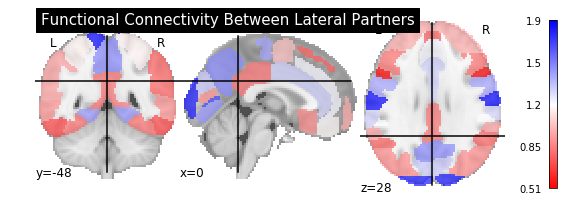

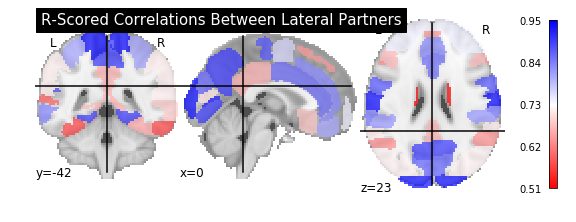

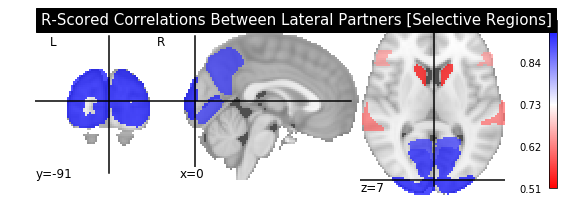

In [19]:
#plotting the correlation values!

#adding together data from cortical and subcortical into one
pleasework = numpy.add(corrdata_vertices, corrdata_vertices2)
#hopefully the affines are the same
new_img3 = nibabel.Nifti1Image(pleasework, affine=atlas_filename.affine)
nilearn.plotting.plot_roi(new_img3, cmap = 'bwr_r', colorbar=True, 
                          title="Functional Connectivity Between Lateral Partners")

#plotting r scored correlations
#adding together data from cortical and subcortical into one
pleasework2 = numpy.add(corrdata_vertices3, corrdata_vertices4)
#hopefully the affines are the same
new_img4 = nibabel.Nifti1Image(pleasework2, affine=atlas_filename.affine)
nilearn.plotting.plot_roi(new_img4, cmap = 'bwr_r', colorbar=True, 
                          title="R-Scored Correlations Between Lateral Partners")

#Plotting selective regions of r scored correlations
#adding together data from cortical and subcortical into one
pleasework3 = numpy.add(corrdata_vertices5, corrdata_vertices6)
#hopefully the affines are the same
new_img5 = nibabel.Nifti1Image(pleasework3, affine=atlas_filename.affine)
nilearn.plotting.plot_roi(new_img5, cmap = 'bwr_r', colorbar=True, 
                          title="R-Scored Correlations Between Lateral Partners [Selective Regions]")

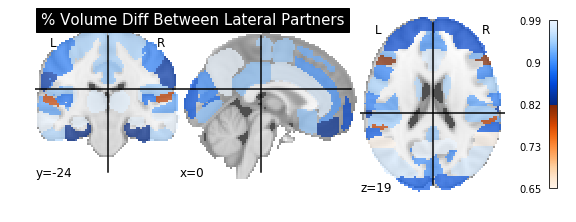

In [20]:
#DISPLAYING VOLUME DIFFS
#adding together data from cortical and subcortical into one
pleasework4 = numpy.add(corrdata_vertices7, corrdata_vertices8)
#hopefully the affines are the same
new_img6 = nibabel.Nifti1Image(pleasework4, affine=atlas_filename.affine)
nilearn.plotting.plot_roi(new_img6, cmap = 'blue_orange_r', colorbar=True, 
                          title="% Volume Diff Between Lateral Partners")

## Statistical Analysis
### Distance & Volume

Estimated intercept coefficient for distance 104.04906093522338
Estimated coefficient for distance 0.0503260717776427


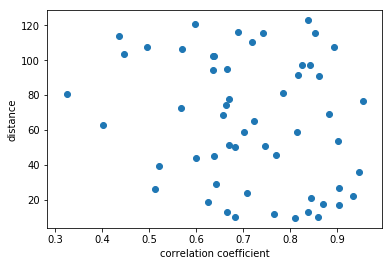

Estimated intercept coefficient for volume 0.8900153416373829
Estimated coefficient for volume 0.0030954976753139185


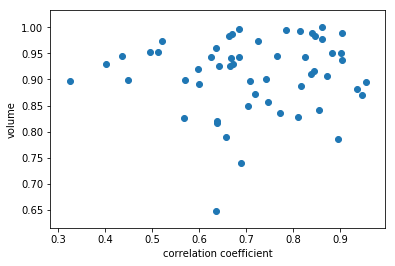

In [25]:

anat_data=numpy.load('masterdata.npy')
anat_data_distance=np.array(anat_data[:,1], dtype='float')
anat_data_volume=np.array(anat_data[:,2], dtype='float')
#regression
Y1=anat_data_distance
X=np.reshape(avg_data,(-1,1))
lm=LinearRegression()
lm.fit(X, Y1)
print('Estimated intercept coefficient for distance', lm.intercept_)
print ('Estimated coefficient for distance',lm.score(X,Y1))
plt.scatter(X,Y1)
plt.xlabel('correlation coefficient')
plt.ylabel('distance')
plt.show()
Y2=anat_data_volume
lm=LinearRegression()
lm.fit(X, Y2)
print('Estimated intercept coefficient for volume', lm.intercept_)
print ('Estimated coefficient for volume',lm.score(X,Y2))
plt.scatter(X,Y2)
plt.xlabel('correlation coefficient')
plt.ylabel('volume')
plt.show()

## Conclusion

While our hypothesis was generally supported, in that the majority of regions with the lowest correlation coefficients have been found to have high lateralization, and the majority of regions with the highest correlation coefficients do not appear to be lateralized. Despite seeing this general trend, there were regions in both cases that did not align with our hypothesis, and the nature of the current literature on lateralization makes it difficult to confidently determine how well our hypothesis is supported by these data.  One future direction that could further support our hypothesis is to run an analysis similar to that of the Nielsen paper, however instead of using the predefined lateralization hubs, we use the regions that we identified with our data driven approach. This would allow us to determine if the regions we identified exhibit lateralized networks, as was found by Nielsen and colleagues, even if the region has not previously been shown to be lateralized in the literature.

This approach could also help further our study on the relationships between structural symmetry and lateralization. Using data-driven regions could take the Watkins paper one step further, revealing structural asymmetries of individual participants throughout the full brain rather than just the surface sulci.  While we were glad to see structural differences using the averaged brain, native anatomy is very unique to each individual, and we likely lost most of the data regarding structural variance. Using native anatomy could teach us more about  region-specific asymmetry and its functional effects, and possibly elucidate a different relationship between the structure and function. 


## Citations


Cameron Craddock, Yassine Benhajali, Carlton Chu, Francois Chouinard, Alan Evans, András 

Jakab, Budhachandra Singh Khundrakpam, John David Lewis, Qingyang Li, Michael 

Milham, Chaogan Yan, Pierre Bellec (2013). The Neuro Bureau Preprocessing Initiative: 

open sharing of preprocessed neuroimaging data and derivatives. In Neuroinformatics 

2013, Stockholm, Sweden.





Desikan RS, Ségonne F, Fischl B, Quinn BT, Dickerson BC, Blacker D, Buckner RL, Dale AM, 

Maguire RP, Hyman BT, Albert MS, Killiany RJ. An automated labeling system for 

subdividing the human cerebral cortex on MRI scans into gyral based regions of interest. 

Neuroimage. 2006 Jul 1;31(3):968-80.





Frazier JA, Chiu S, Breeze JL, Makris N, Lange N, Kennedy DN, Herbert MR, Bent EK, Koneru 

VK, Dieterich ME, Hodge SM, Rauch SL, Grant PE, Cohen BM, Seidman LJ, Caviness 

VS, Biederman J. Structural brain magnetic resonance imaging of limbic and thalamic 

volumes in pediatric bipolar disorder. Am J Psychiatry. 2005 Jul;162(7):1256-65





Goldstein JM, Seidman LJ, Makris N, Ahern T, O'Brien LM, Caviness VS Jr, Kennedy DN, 

Faraone SV, Tsuang MT. Hypothalamic abnormalities in schizophrenia: sex effects and 

genetic vulnerability. Biol Psychiatry. 2007 Apr 15;61(8):935-45





Gordon, E. M., Laumann, T. O., Gilmore, A. W., Newbold, D. J., Greene, D. J., Berg, J. J., … 

Dosenbach, N. U. F. (2017). Precision Functional Mapping of Individual Human Brains. 

Neuron, 95(4), 791–807.e7. http://doi.org/https://doi.org/10.1016/j.neuron.2017.07.011





Makris N, Goldstein JM, Kennedy D, Hodge SM, Caviness VS, Faraone SV, Tsuang MT, 

Seidman LJ. Decreased volume of left and total anterior insular lobule in schizophrenia. 

Schizophr Res. 2006 Apr;83(2-3):155-71





Mazziotta, J., Toga, A., Evans, A., Fox, P., Lancaster, J., Zilles, K., … Mazoyer, B. (2001). A 

probabilistic atlas and reference system for the human brain : International Consortium 

for Brain Mapping ( ICBM ), 1293–1322. http://doi.org/10.1098/rstb.2001.0915





Raymond Salvador, John Suckling, Martin R. Coleman, John D. Pickard, David Menon, Ed 

Bullmore; Neurophysiological Architecture of Functional Magnetic Resonance Images of 

Human Brain, Cerebral Cortex, Volume 15, Issue 9, 1 September 2005, Pages 

1332–1342, https://doi.org/10.1093/cercor/bhi016





Toga, A. W., & Thompson, P. M. (2003). Mapping brain asymmetry. Nature Reviews 

Neuroscience, 4(1), 37–48. http://doi.org/10.1038/nrn1009





Watkins, K. E., Paus, T., Lerch, J. P., & Zijdenbos, A. (2001). Structural Asymmetries in the 

Human Brain : a Voxel-based Statistical Analysis of 142 MRI Scans, 868–877.





Fusar-Poli, P., et al. "Laterality effect on emotional faces processing: ALE meta-analysis of evidence." Neuroscience letters 452.3 (2009): 262-267.





Pinel, Philippe, and Stanislas Dehaene. "Beyond hemispheric dominance: brain regions underlying the joint lateralization of language and arithmetic to the left hemisphere." Journal of Cognitive Neuroscience 22.1 (2010): 48-66.





Lundstrom, Brian Nils, et al. "Isolating the retrieval of imagined pictures during episodic memory: activation of the left precuneus and left prefrontal cortex." Neuroimage 20.4 (2003): 1934-1943





Cavanna, Andrea E., and Michael R. Trimble. "The precuneus: a review of its functional anatomy and behavioural correlates." Brain 129.3 (2006): 564-583.





Grodzinsky, Yosef. "The neurology of syntax: Language use without Broca's area." Behavioral and brain sciences 23.1 (2000): 1-21





Zatorre, Robert J., et al. "Lateralization of phonetic and pitch discrimination in speech processing." Science 256.5058 (1992): 846-849.





Cauda, Franco, et al. "Functional connectivity of the insula in the resting brain." Neuroimage 55.1 (2011): 8-23.





Koutstaal, W., et al. "Perceptual specificity in visual object priming: functional magnetic resonance imaging evidence for a laterality difference in fusiform cortex." Neuropsychologia39.2 (2001): 184-199.





Nielsen, Jared A., et al. "An evaluation of the left-brain vs. right-brain hypothesis with resting state functional connectivity magnetic resonance imaging." PloS one 8.8 (2013): e71275.




